

# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Investigating the TMDb Movie Data (cleaned from original data on Kaggle). The Data will go through a wrangling process that will lead to a cleaned data set that will be analyzed to answer some questions that I wonder.

> First, what are the characteristics of top high rated movies? 

> Second , what genres that audience prefer the most?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Which will contain :

> First , loading data from the CSV file that cleaned on Kaggle.

> Second, Assessing the data and find both tidiness and quailty issues.

> Third, Cleaining the data set and store it in a new CSV file.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")

df.head(3)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


# Assess

#### Quality Issues :
- id column type is int format and there are no need to do any mathematical oprations on it.

- release_date cloumn type is str format.

- missing values in colums
(imdb_id,cast,homepage,director,tagline,keywords,overview,genres,production_companies).

- dupicate in line 2090.

- 31 row with 0 values in runtime column.

- budget_adj column type in float format.

- revenue_adj column type in float format.

- 5696 with 0 values in budget_adj column.

- 6016 with 0 values in revenue_adj column.


#### Tidiness Issues :

- cast,homepage,tagline,keywords,overview and production companies columns will not be necessary for my analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
sum(df.duplicated())

1

> Serching for duplicats

In [6]:
df.loc[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> The duplicated line

In [7]:
df.loc[df.runtime == 0]["runtime"].count()

31

In [8]:
df.loc[df.vote_count == 0]["vote_count"].count()

0

In [9]:
df.loc[df.vote_average == 0]["vote_average"].count()

0

In [10]:
df.loc[df.budget_adj == 0]["budget_adj"].count()

5696

In [11]:
df.loc[df.revenue_adj == 0]["revenue_adj"].count()

6016

> Searching for 0 values in runtime , vote_count ,vote_average,budget_adj,revenue_adj columns

In [12]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Find all NaNs values in all columns

In [13]:
sum(df.imdb_id.isnull())

10

In [14]:
df[df.imdb_id.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0


In [15]:
sum(df.director.isnull())

44

In [16]:
df[df.director.isnull()].head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,tt4073952,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,http://www.iliza.com/freezing-hot.html,NaN,NaN,...,Smart and brazen comedian Iliza Shlesinger sha...,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.0,0.0
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.0,0.0
556,321160,tt3908634,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,http://www.mylifetime.com/movies/with-this-ring,NaN,NaN,...,After attending their friend Elise's (Sudano) ...,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.0,0.0


In [17]:
sum(df.genres.isnull())

23

In [18]:
df[df.genres.isnull()].head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.0,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.0,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0


# Clean

Cleaning the data issues both quaity and tidiness and save it in new data frame.

In [19]:
clean_df = df.copy()

> Create a new DF to make the new adjustments.

### Define
- Change the id column from int to str type

### Code

In [20]:
clean_df['id'] = clean_df.id.astype(str)

### Test

In [21]:
clean_df.id.dtype

dtype('O')

### Define
- Change the release_date cloumn type to datetime  

### Code

In [22]:
clean_df.release_date = pd.to_datetime(clean_df.release_date)

### Test

In [23]:
clean_df.release_date.dtype

dtype('<M8[ns]')

### Define
- drop duplicated line 2090 

### Code

In [24]:
clean_df.drop_duplicates(inplace = True)

### Test

In [25]:
sum(clean_df.duplicated())

0

### Define
- drop NaN values from geners column

### Code

In [26]:
clean_df = clean_df.dropna(subset= ["genres"])

### Test

In [27]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
id                      10842 non-null object
imdb_id                 10834 non-null object
popularity              10842 non-null float64
budget                  10842 non-null int64
revenue                 10842 non-null int64
original_title          10842 non-null object
cast                    10767 non-null object
homepage                2931 non-null object
director                10800 non-null object
tagline                 8036 non-null object
keywords                9367 non-null object
overview                10839 non-null object
runtime                 10842 non-null int64
genres                  10842 non-null object
production_companies    9826 non-null object
release_date            10842 non-null datetime64[ns]
vote_count              10842 non-null int64
vote_average            10842 non-null float64
release_year            10842 non-null int64
budget_adj      

### Define
- Tidiness issue , Drop all columns that not necessary for our analize

### Code

In [28]:
clean_df = clean_df.drop(["cast", "homepage", "tagline","keywords","overview","production_companies"],axis=1)

### Test

In [29]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 15 columns):
id                10842 non-null object
imdb_id           10834 non-null object
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
director          10800 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 1.3+ MB


### Define
- Replace 0 in runtime with NaN values.

### Code

In [30]:
clean_df.runtime.replace(0, np.nan, inplace=True)

### Test

In [31]:
clean_df.loc[df.runtime == 0]["runtime"].count()

0

In [32]:
clean_df.runtime.isna().sum()

30

### Define
- Drop runtime column NaN values.

### Code

In [33]:
clean_df = clean_df.dropna(subset= ["runtime"])

### Test

In [34]:
clean_df.runtime.isna().sum()

0

### Define 
- Drop director column NaN Values

### Code

In [35]:
clean_df = clean_df.dropna(subset= ["director"])

### Test

In [36]:
clean_df.runtime.isna().sum()

0

In [37]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10772 entries, 0 to 10865
Data columns (total 15 columns):
id                10772 non-null object
imdb_id           10767 non-null object
popularity        10772 non-null float64
budget            10772 non-null int64
revenue           10772 non-null int64
original_title    10772 non-null object
director          10772 non-null object
runtime           10772 non-null float64
genres            10772 non-null object
release_date      10772 non-null datetime64[ns]
vote_count        10772 non-null int64
vote_average      10772 non-null float64
release_year      10772 non-null int64
budget_adj        10772 non-null float64
revenue_adj       10772 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(5)
memory usage: 1.3+ MB


### Define 
- Replacing imdb_id column NaN values with the correct ID from IMDB website

In [38]:
clean_df[clean_df.imdb_id.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Frank Paur,38.0,Animation|Action|Science Fiction,2009-01-27,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Sam Liu,41.0,Action|Animation|Fantasy|Science Fiction,2009-01-27,38,6.4,2009,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Connor McGuire|Colin McGuire,7.0,Action|Science Fiction,2013-10-08,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Mikael Salomon,80.0,Action|Adventure|Drama|Fantasy|Family,2007-01-01,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Mikael Salomon,80.0,Adventure|Fantasy|Drama|Action|Science Fiction,2007-01-01,13,7.0,2007,0.000000,0.0


### Code

In [39]:
clean_df.loc[1528,"imdb_id"] = "tt1325753"
clean_df.loc[1750,"imdb_id"] = "tt1325753"
clean_df.loc[6071,"imdb_id"] = "tt9755546"
clean_df.loc[7527,"imdb_id"] = "tt8936254"

In [40]:
clean_df[clean_df.imdb_id.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Mikael Salomon,80.0,Adventure|Fantasy|Drama|Action|Science Fiction,2007-01-01,13,7.0,2007,0.0,0.0


> Note: I can't find it at IMDB site , so I will drop this row

In [41]:
clean_df = clean_df.dropna(subset= ["imdb_id"])

### Test

In [42]:
clean_df.imdb_id.isna().sum()

0

### Define
- Dealing with 0 values in both budget_adj and revenue_adj columns.

> Note: Dropping the 0 Values lines will affect the data set a lot it will drop more than half of it. The best practice I will drop the 2 columns. because they will not be part of my analysis

### Code

In [43]:
clean_df = clean_df.drop(["budget_adj","revenue_adj"],axis=1)

### Test

In [44]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10771 entries, 0 to 10865
Data columns (total 13 columns):
id                10771 non-null object
imdb_id           10771 non-null object
popularity        10771 non-null float64
budget            10771 non-null int64
revenue           10771 non-null int64
original_title    10771 non-null object
director          10771 non-null object
runtime           10771 non-null float64
genres            10771 non-null object
release_date      10771 non-null datetime64[ns]
vote_count        10771 non-null int64
vote_average      10771 non-null float64
release_year      10771 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 1.2+ MB


### Define
- Change the runtime cloumn to int format

### Code

In [45]:
clean_df['runtime'] = clean_df.runtime.astype(int)

### Test

In [46]:
clean_df.runtime.dtype

dtype('int32')

In [47]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10771 entries, 0 to 10865
Data columns (total 13 columns):
id                10771 non-null object
imdb_id           10771 non-null object
popularity        10771 non-null float64
budget            10771 non-null int64
revenue           10771 non-null int64
original_title    10771 non-null object
director          10771 non-null object
runtime           10771 non-null int32
genres            10771 non-null object
release_date      10771 non-null datetime64[ns]
vote_count        10771 non-null int64
vote_average      10771 non-null float64
release_year      10771 non-null int64
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4), object(5)
memory usage: 1.1+ MB


In [48]:
clean_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


## Storing  the cleaned DF in new CSV file 

In [49]:
# save the final DF as twitter_archive_master.csv as requisted

clean_df.to_csv("tmdb_cleaned.csv")

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 ( what are the characteristics of the highest rated movies?)

> Getting some info to detrmaine what are the top movies?

In [50]:
clean_df.vote_count.describe()

count    10771.000000
mean       219.133599
std        577.849529
min         10.000000
25%         17.000000
50%         39.000000
75%        147.000000
max       9767.000000
Name: vote_count, dtype: float64

In [51]:
clean_df.vote_average.describe()

count    10771.000000
mean         5.972194
std          0.932867
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

> I will count on 2 main factors vote_count and vote_average.

- Since the gap between 75% and max of vote_count values is very wide I will pick 1000 to start from.

- Since the gab between 75% and max of vote_average values is around 6.6 and 9.2. I will take their mean which is 7.9.

In [52]:
sum((clean_df.vote_average > 7.9) & (clean_df.vote_count > 1000))

20

- There are 20 movies within these values.

- I will assign these movies in top_rated df.

In [53]:
top_rated = clean_df[(clean_df.vote_average > 7.9) & (clean_df.vote_count > 1000)]
top_rated

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015
35,264644,tt3170832,3.557846,6000000,35401758,Room,Lenny Abrahamson,117,Drama|Thriller,2015-10-16,1520,8.0,2015
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,Adventure|Drama|Science Fiction,2014-11-05,6498,8.0,2014
636,205596,tt2084970,8.110711,14000000,233555708,The Imitation Game,Morten Tyldum,113,History|Drama|Thriller|War,2014-11-14,3478,8.0,2014
650,244786,tt2582802,4.780419,3300000,13993093,Whiplash,Damien Chazelle,105,Drama|Music,2014-10-10,2372,8.2,2014
2409,550,tt0137523,8.947905,63000000,100853753,Fight Club,David Fincher,139,Drama,1999-10-14,5923,8.1,1999
2414,497,tt0120689,2.719461,60000000,284600000,The Green Mile,Frank Darabont,189,Fantasy|Drama|Crime,1999-12-10,2299,8.0,1999
2875,155,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christopher Nolan,152,Drama|Action|Crime|Thriller,2008-07-16,8432,8.1,2008
4177,680,tt0110912,8.093754,8000000,213928762,Pulp Fiction,Quentin Tarantino,154,Thriller|Crime,1994-10-14,5343,8.1,1994
4178,278,tt0111161,7.192039,25000000,28341469,The Shawshank Redemption,Frank Darabont,142,Drama|Crime,1994-09-10,5754,8.4,1994


- Getting a look about the mean and the max vote_average for the top movies.

In [54]:
top_rated.vote_average.describe()

count    20.000000
mean      8.075000
std       0.111803
min       8.000000
25%       8.000000
50%       8.000000
75%       8.100000
max       8.400000
Name: vote_average, dtype: float64

- Splitting the genres cloumn values and take the first index (which is the main genre of the movie)

In [55]:
top_rated["genres"] = top_rated.genres.str.split('|').str[0]
top_rated

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy,2015-06-09,3935,8.0,2015
35,264644,tt3170832,3.557846,6000000,35401758,Room,Lenny Abrahamson,117,Drama,2015-10-16,1520,8.0,2015
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,Adventure,2014-11-05,6498,8.0,2014
636,205596,tt2084970,8.110711,14000000,233555708,The Imitation Game,Morten Tyldum,113,History,2014-11-14,3478,8.0,2014
650,244786,tt2582802,4.780419,3300000,13993093,Whiplash,Damien Chazelle,105,Drama,2014-10-10,2372,8.2,2014
2409,550,tt0137523,8.947905,63000000,100853753,Fight Club,David Fincher,139,Drama,1999-10-14,5923,8.1,1999
2414,497,tt0120689,2.719461,60000000,284600000,The Green Mile,Frank Darabont,189,Fantasy,1999-12-10,2299,8.0,1999
2875,155,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christopher Nolan,152,Drama,2008-07-16,8432,8.1,2008
4177,680,tt0110912,8.093754,8000000,213928762,Pulp Fiction,Quentin Tarantino,154,Thriller,1994-10-14,5343,8.1,1994
4178,278,tt0111161,7.192039,25000000,28341469,The Shawshank Redemption,Frank Darabont,142,Drama,1994-09-10,5754,8.4,1994


- Getting info about average budget of them.

In [56]:
top_rated.budget.mean()

43655347.4

- Getting info about average revenue of them.

In [57]:
top_rated.revenue.mean()

272665612.0

- Getting info about average run time of them.

In [58]:
top_rated.runtime.mean()

141.15

- find the years that have more top movies than the others.

In [59]:
top_rated.release_year.mode()

0    1994
1    2014
dtype: int64

- 1994 and 2014 was awesome years every year got 3 top movies.

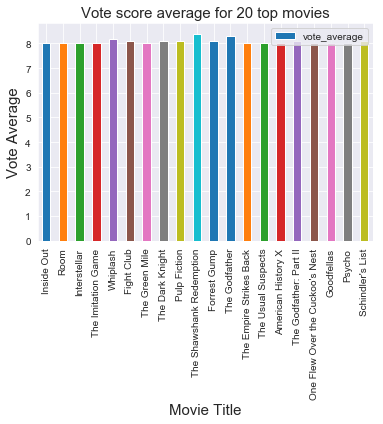

In [60]:
top_rated.plot(x= "original_title",y = "vote_average" , kind="bar") ;
plt.xlabel("Movie Title" ,fontsize = 15)
plt.ylabel("Vote Average",fontsize = 15)
plt.title("Vote score average for 20 top movies",fontsize = 15);

- It appeats that was the top movie got vote score which is 8.4 was (The Shawshank Redemption).

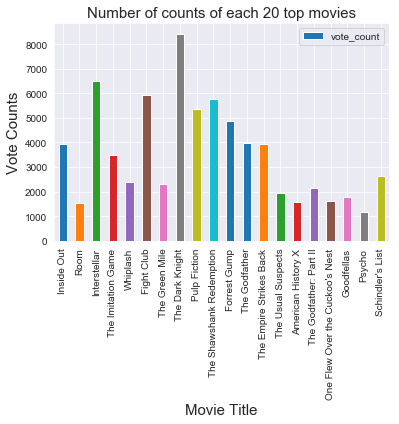

In [61]:
top_rated.plot(x= "original_title",y = "vote_count" , kind="bar") ;
plt.xlabel("Movie Title" ,fontsize = 15)
plt.ylabel("Vote Counts",fontsize = 15)
plt.title("Number of counts of each 20 top movies",fontsize = 15);

- The film that got most vote counts is (The Dark Knight), after it (Intersteller).

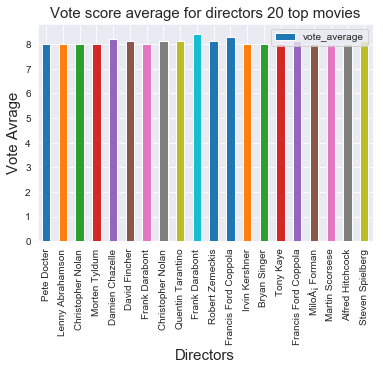

In [62]:
top_rated.plot(x= "director",y = "vote_average" , kind="bar") ;
plt.xlabel("Directors" ,fontsize = 15)
plt.ylabel("Vote Avrage",fontsize = 15)
plt.title("Vote score average for directors 20 top movies",fontsize = 15);

- Frank Darabont was the most dirctor to got highest voting score.

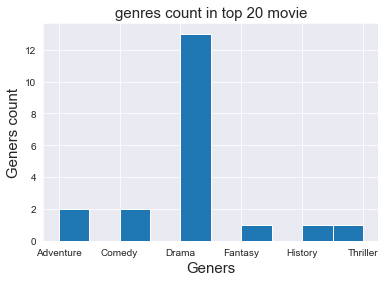

In [63]:
top_rated["genres"].hist();
plt.xlabel("Geners" ,fontsize = 15)
plt.ylabel("Geners count",fontsize = 15)
plt.title("genres count in top 20 movie",fontsize = 15);

- Drama is the most gener in the top 20 movies, Intresting.

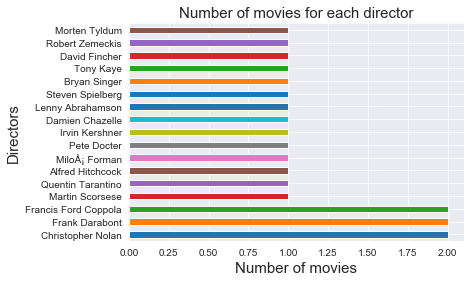

In [64]:
top_rated["director"].value_counts().plot.barh();
plt.xlabel("Number of movies" ,fontsize = 15)
plt.ylabel("Directors",fontsize = 15)
plt.title("Number of movies for each director",fontsize = 15);

- Frank Darabont , Franicis Ford and Christopher Nolan every one of these directors got 2 movies in the top 20.

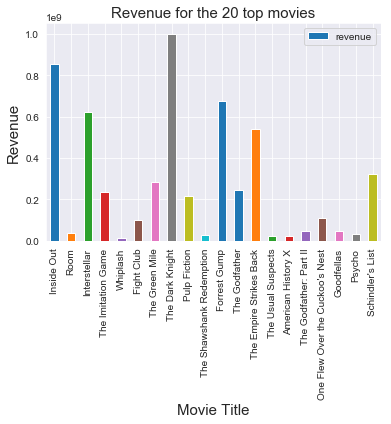

In [65]:
top_rated.plot(x= "original_title",y = "revenue" , kind="bar") ;
plt.xlabel("Movie Title" ,fontsize = 15)
plt.ylabel("Revenue",fontsize = 15)
plt.title("Revenue for the 20 top movies",fontsize = 15);

- The Dark knight had the most revenue.

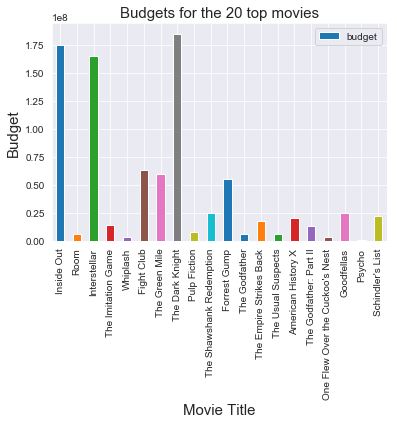

In [66]:
top_rated.plot(x= "original_title",y = "budget" , kind="bar") ;
plt.xlabel("Movie Title" ,fontsize = 15)
plt.ylabel("Budget",fontsize = 15)
plt.title("Budgets for the 20 top movies",fontsize = 15);

- once again (The Dark knight) got the most budget in the top 20s.

In [67]:
top_rated["profit"] = top_rated["revenue"] - top_rated["budget"]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


> Made a new column profit which calculate the difference between revenue and budget

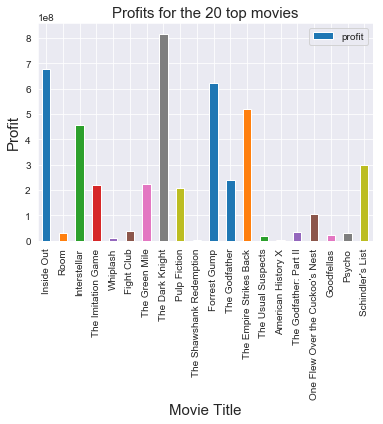

In [68]:
top_rated.plot(x= "original_title",y = "profit" , kind="bar") ;
plt.xlabel("Movie Title" ,fontsize = 15)
plt.ylabel("Profit",fontsize = 15)
plt.title("Profits for the 20 top movies",fontsize = 15);

- At last , seems that The Dark Knight is the black horse of the top 20 movies, My fav movie ever.

In [69]:
top_rated.vote_count.describe()

count      20.000000
mean     3559.600000
std      2017.437024
min      1180.000000
25%      1906.000000
50%      3055.000000
75%      4977.750000
max      8432.000000
Name: vote_count, dtype: float64

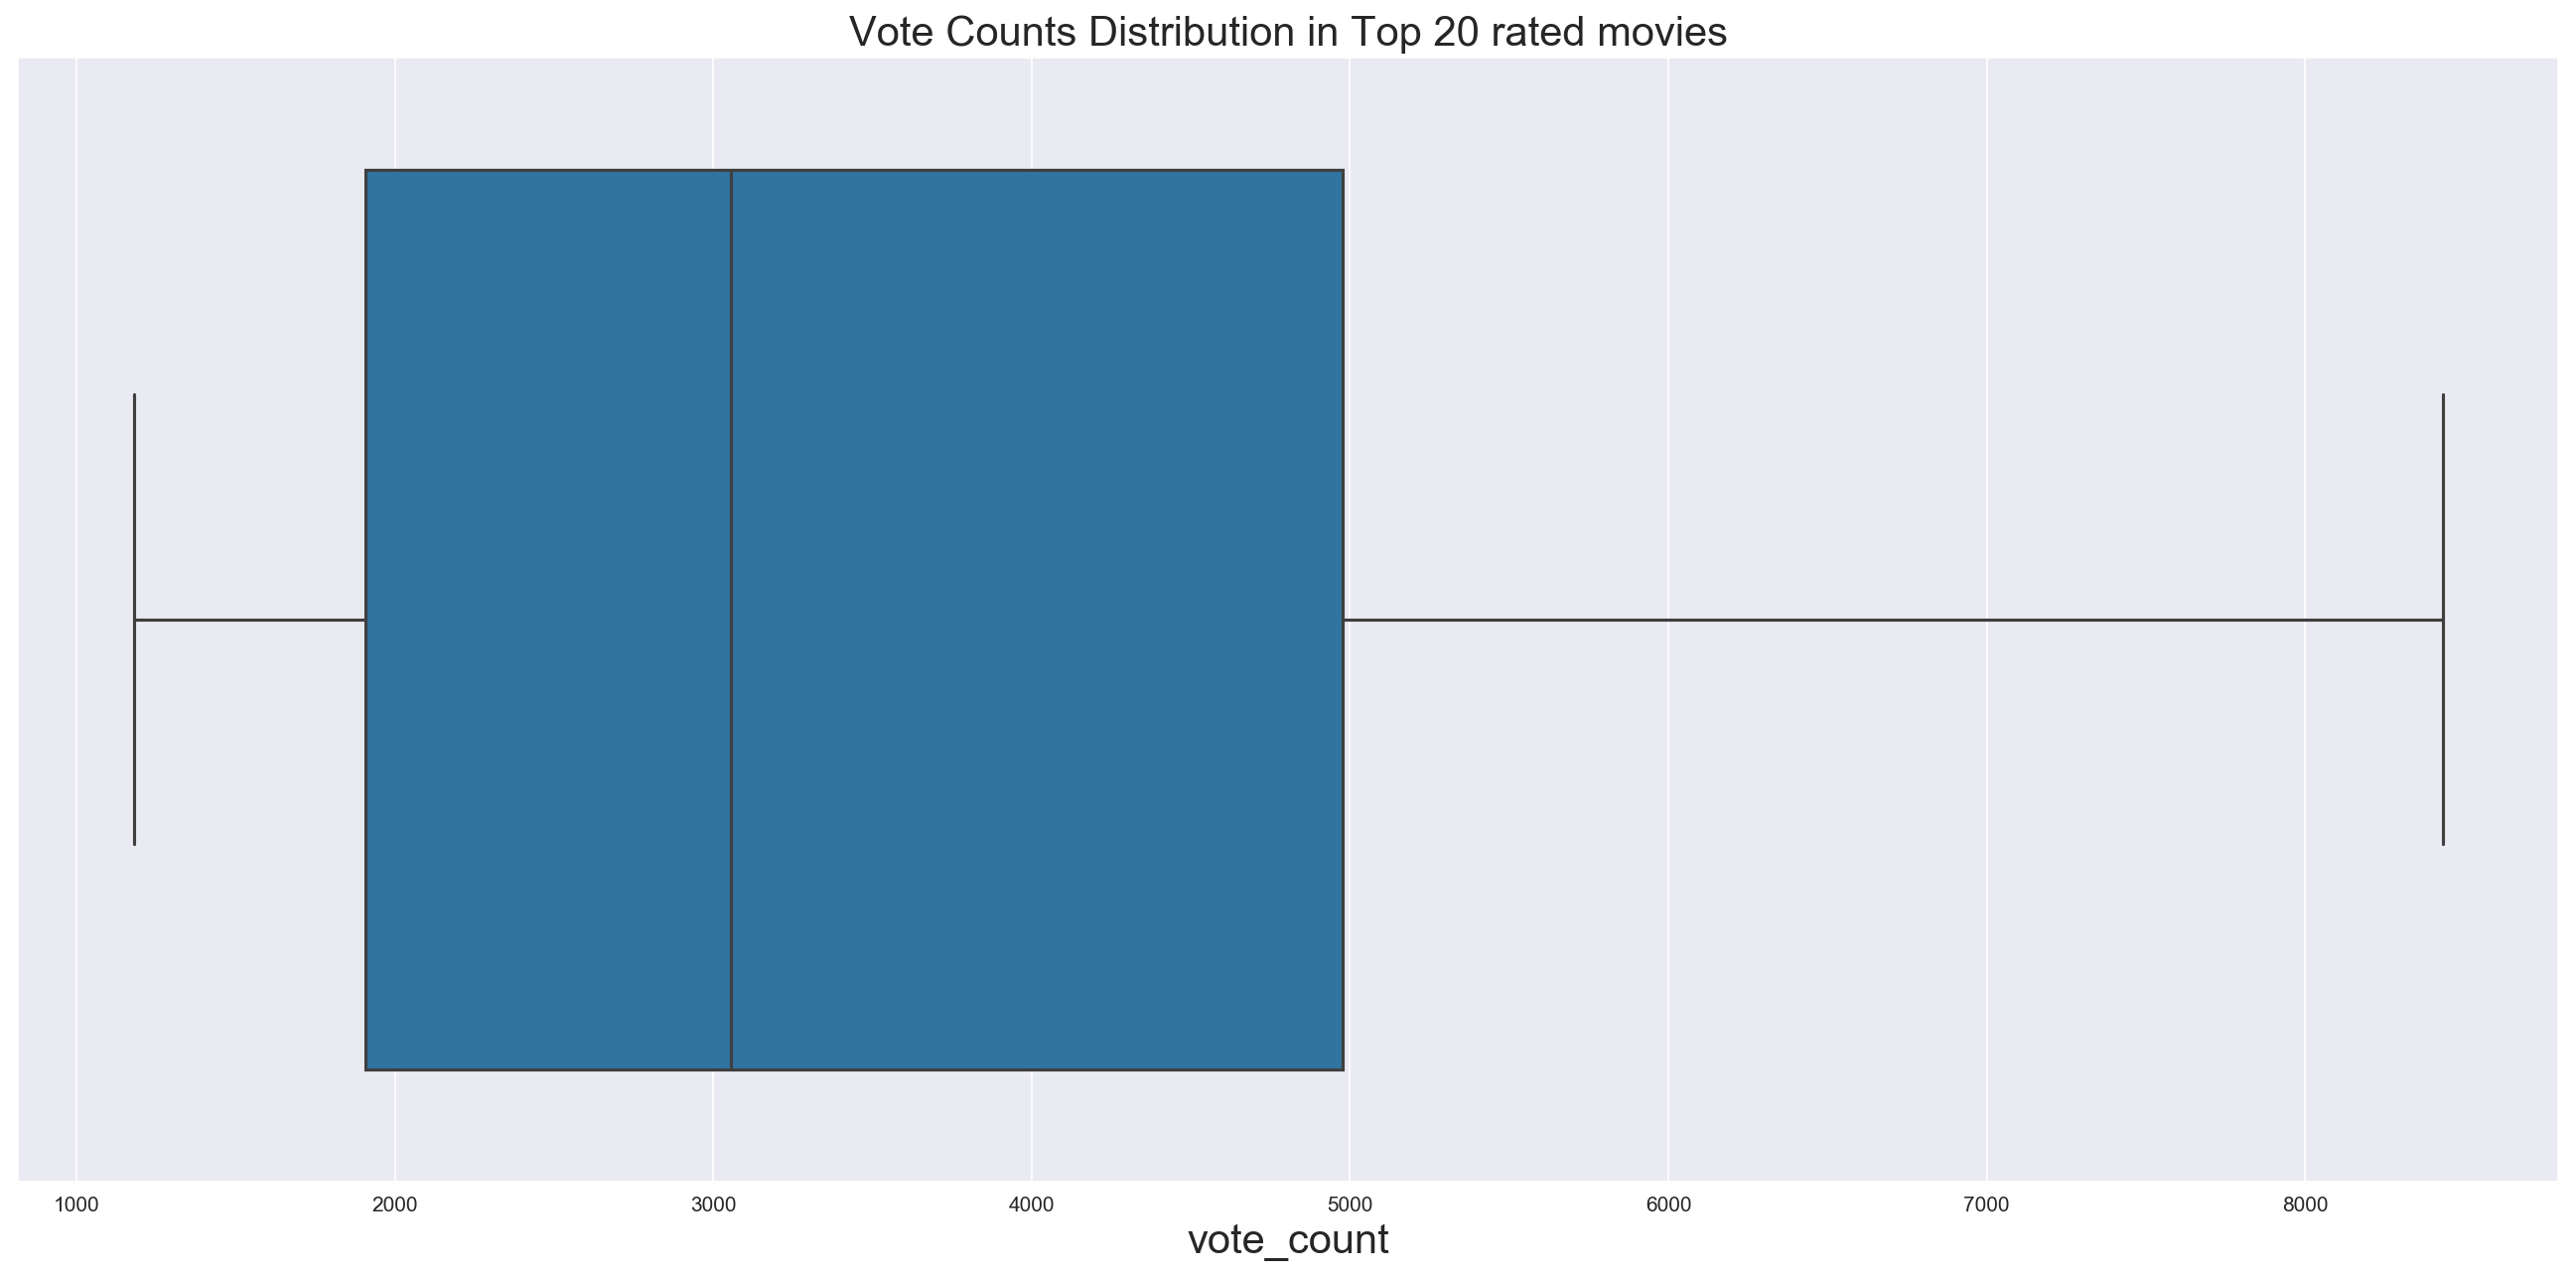

In [70]:
vote_counts = top_rated["vote_count"]
plt.figure(figsize= (22,10),dpi = 150)
plt.xlabel("vote_count" ,fontsize = 20)
plt.title("Vote Counts Distribution in Top 20 rated movies",fontsize = 20)
sns.boxplot(vote_counts) ;

- The vote counts distribution appears that the minimum counts 1180 votes and the maximum 8432 Votes.
 > when Q1 of votes is 1906

 > when Q2(median) of votes is 3055.

 > when Q3 of votes is 4977.

- IQR range from 1906 vote to 4977.

### Research Question 2  (What are genres that audience prefer the most?)

- Getting some info about the data set.

In [71]:
clean_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10771.000000,1.077100e+04,1.077100e+04,10771.000000,10771.000000,10771.000000,10771.000000
mean,0.650697,1.474970e+07,4.017345e+07,102.457432,219.133599,5.972194,2001.264971
std,1.003349,3.101946e+07,1.174587e+08,30.379827,577.849529,0.932867,12.825809
min,0.000188,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,0.210087,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.386180,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000
75%,0.718914,1.600000e+07,2.476490e+07,112.000000,147.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [72]:
clean_df.runtime.mean()

102.45743199331538

- The average run time for all the movies.

In [73]:
clean_df.revenue.mean()

40173449.6216693

- The average revenue for all the movies.

In [74]:
clean_df.budget.mean()

14749701.335901959

- The average budget for all the movies.

- split the values of the genres cloumn and take the first index as the main genre of the movie.

In [75]:
clean_df["genres"] = clean_df.genres.str.split('|').str[0]
clean_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2015-03-18,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2015-04-01,2947,7.3,2015


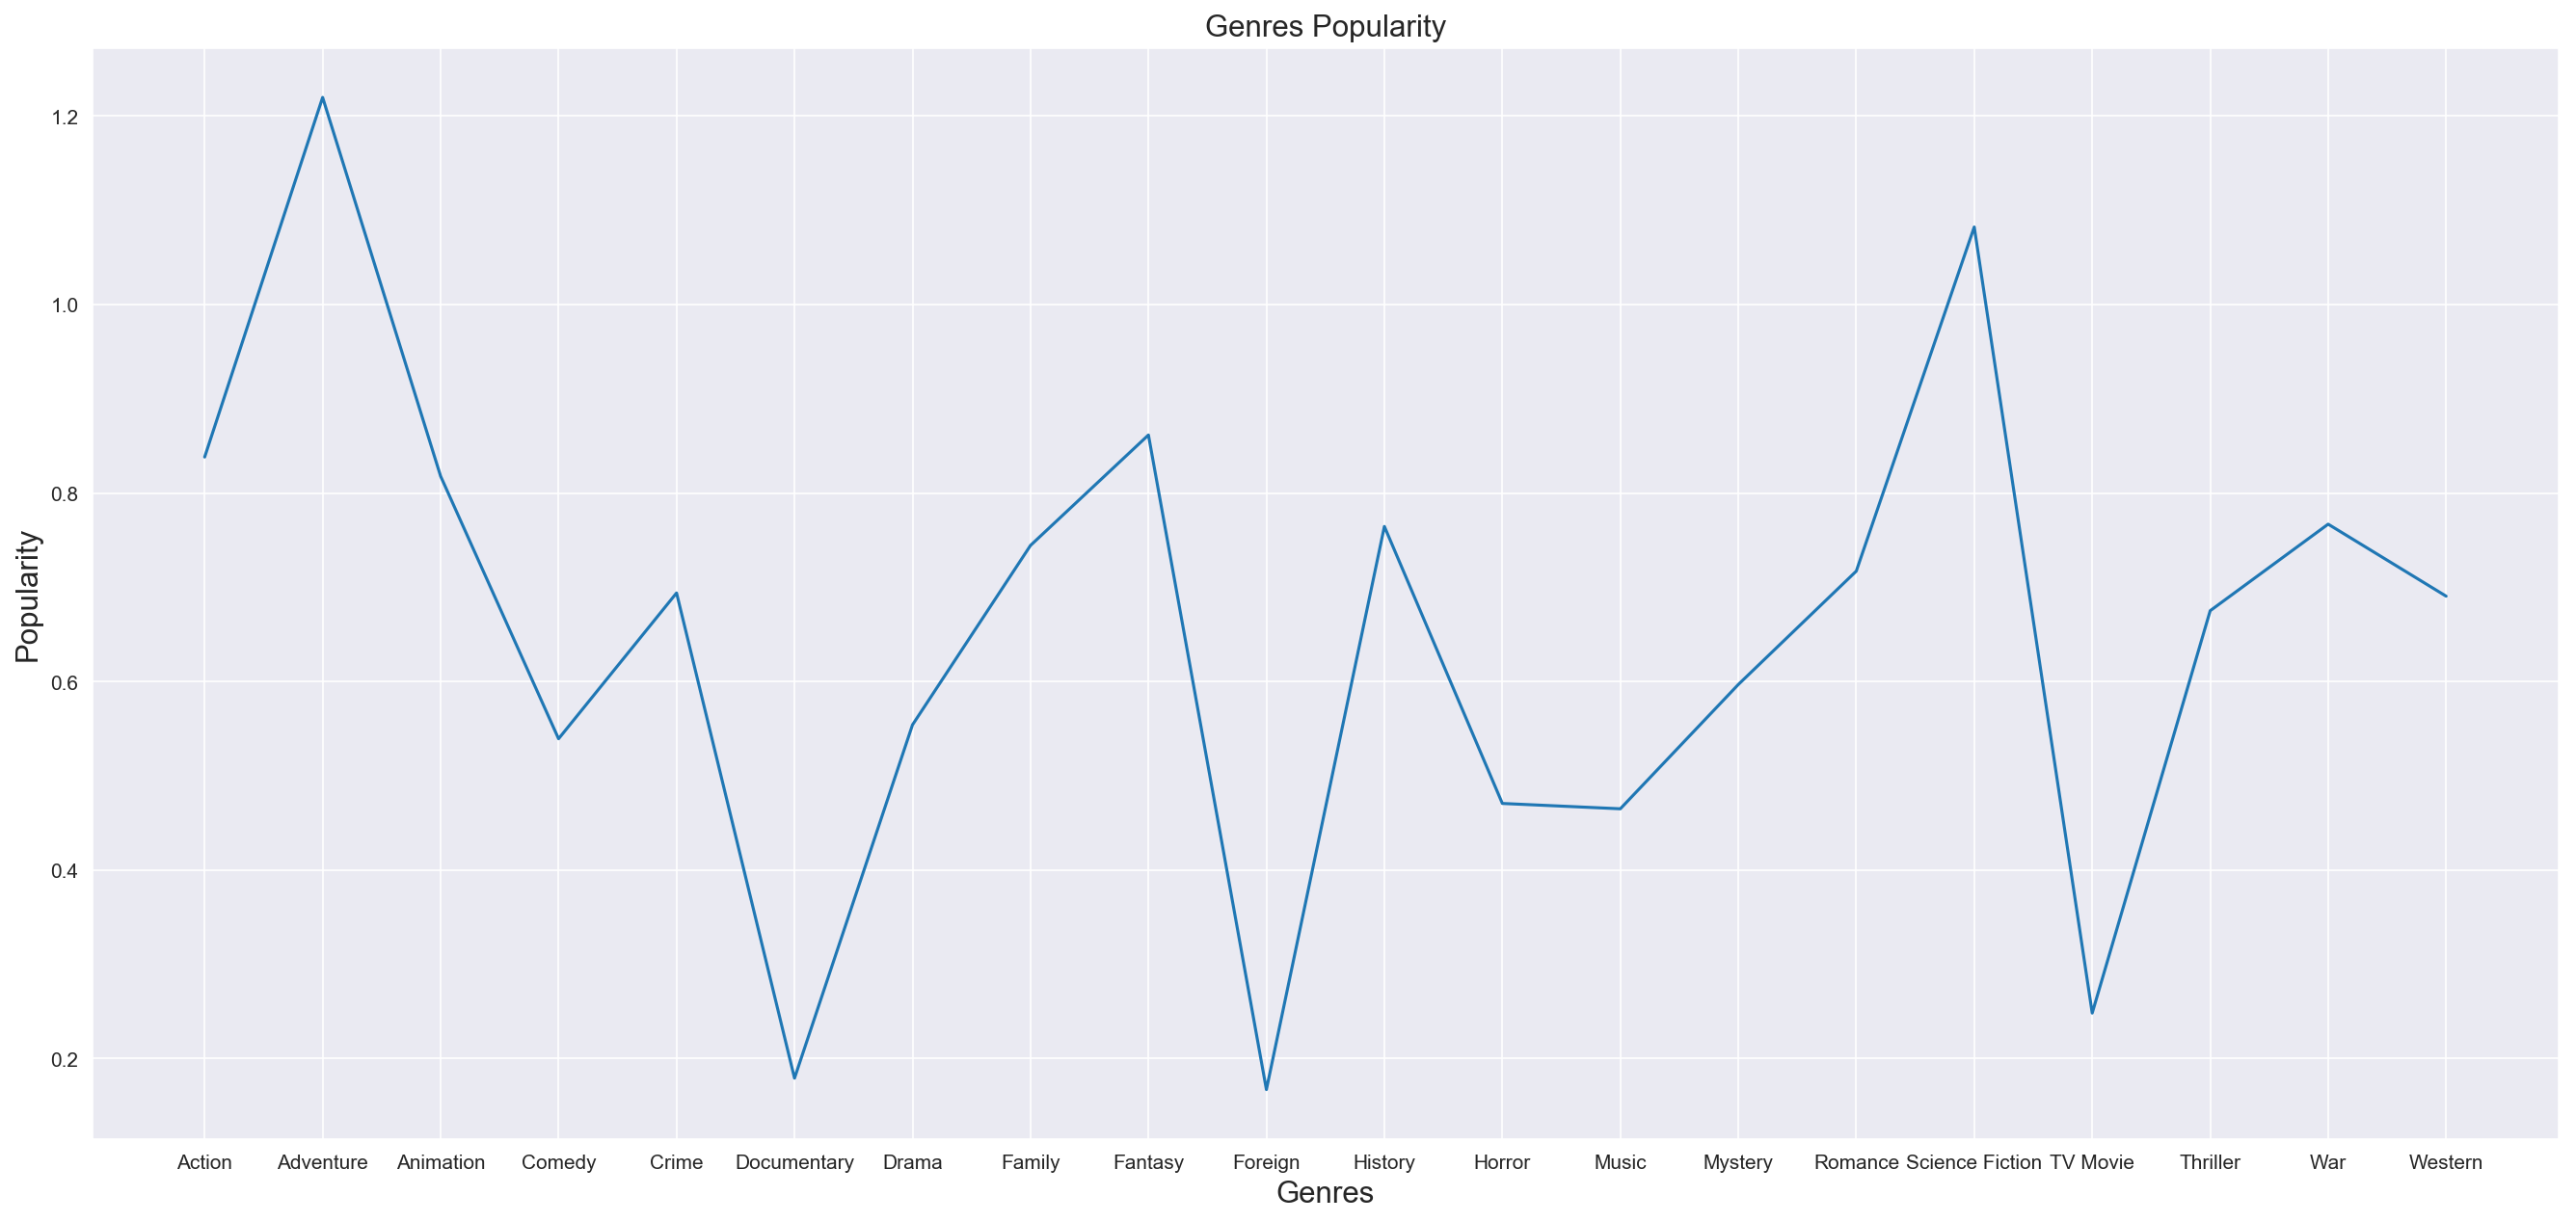

In [76]:
fav_geners = clean_df.groupby("genres")["popularity"].mean()
plt.figure(figsize= (22,10),dpi = 150)
plt.xlabel("Genres" ,fontsize = 15)
plt.ylabel("Popularity",fontsize = 15)
plt.title("Genres Popularity",fontsize = 15)
plt.plot(fav_geners) ;

- The most popular movie genres is adventure in the first place comes Sci-Fi after it.

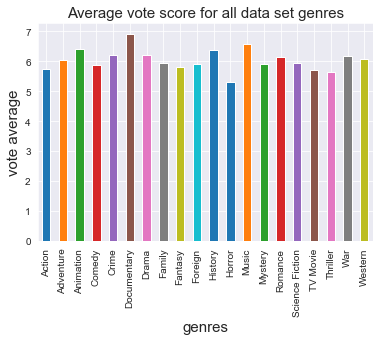

In [77]:
vote_geners = clean_df.groupby("genres")["vote_average"].mean()
plt.xlabel("genres",fontsize = 15)
plt.ylabel("vote average",fontsize = 15)
plt.title("Average vote score for all data set genres",fontsize = 15)
vote_geners.plot.bar();

- The most vote scores goes to documentary movies and music after it.

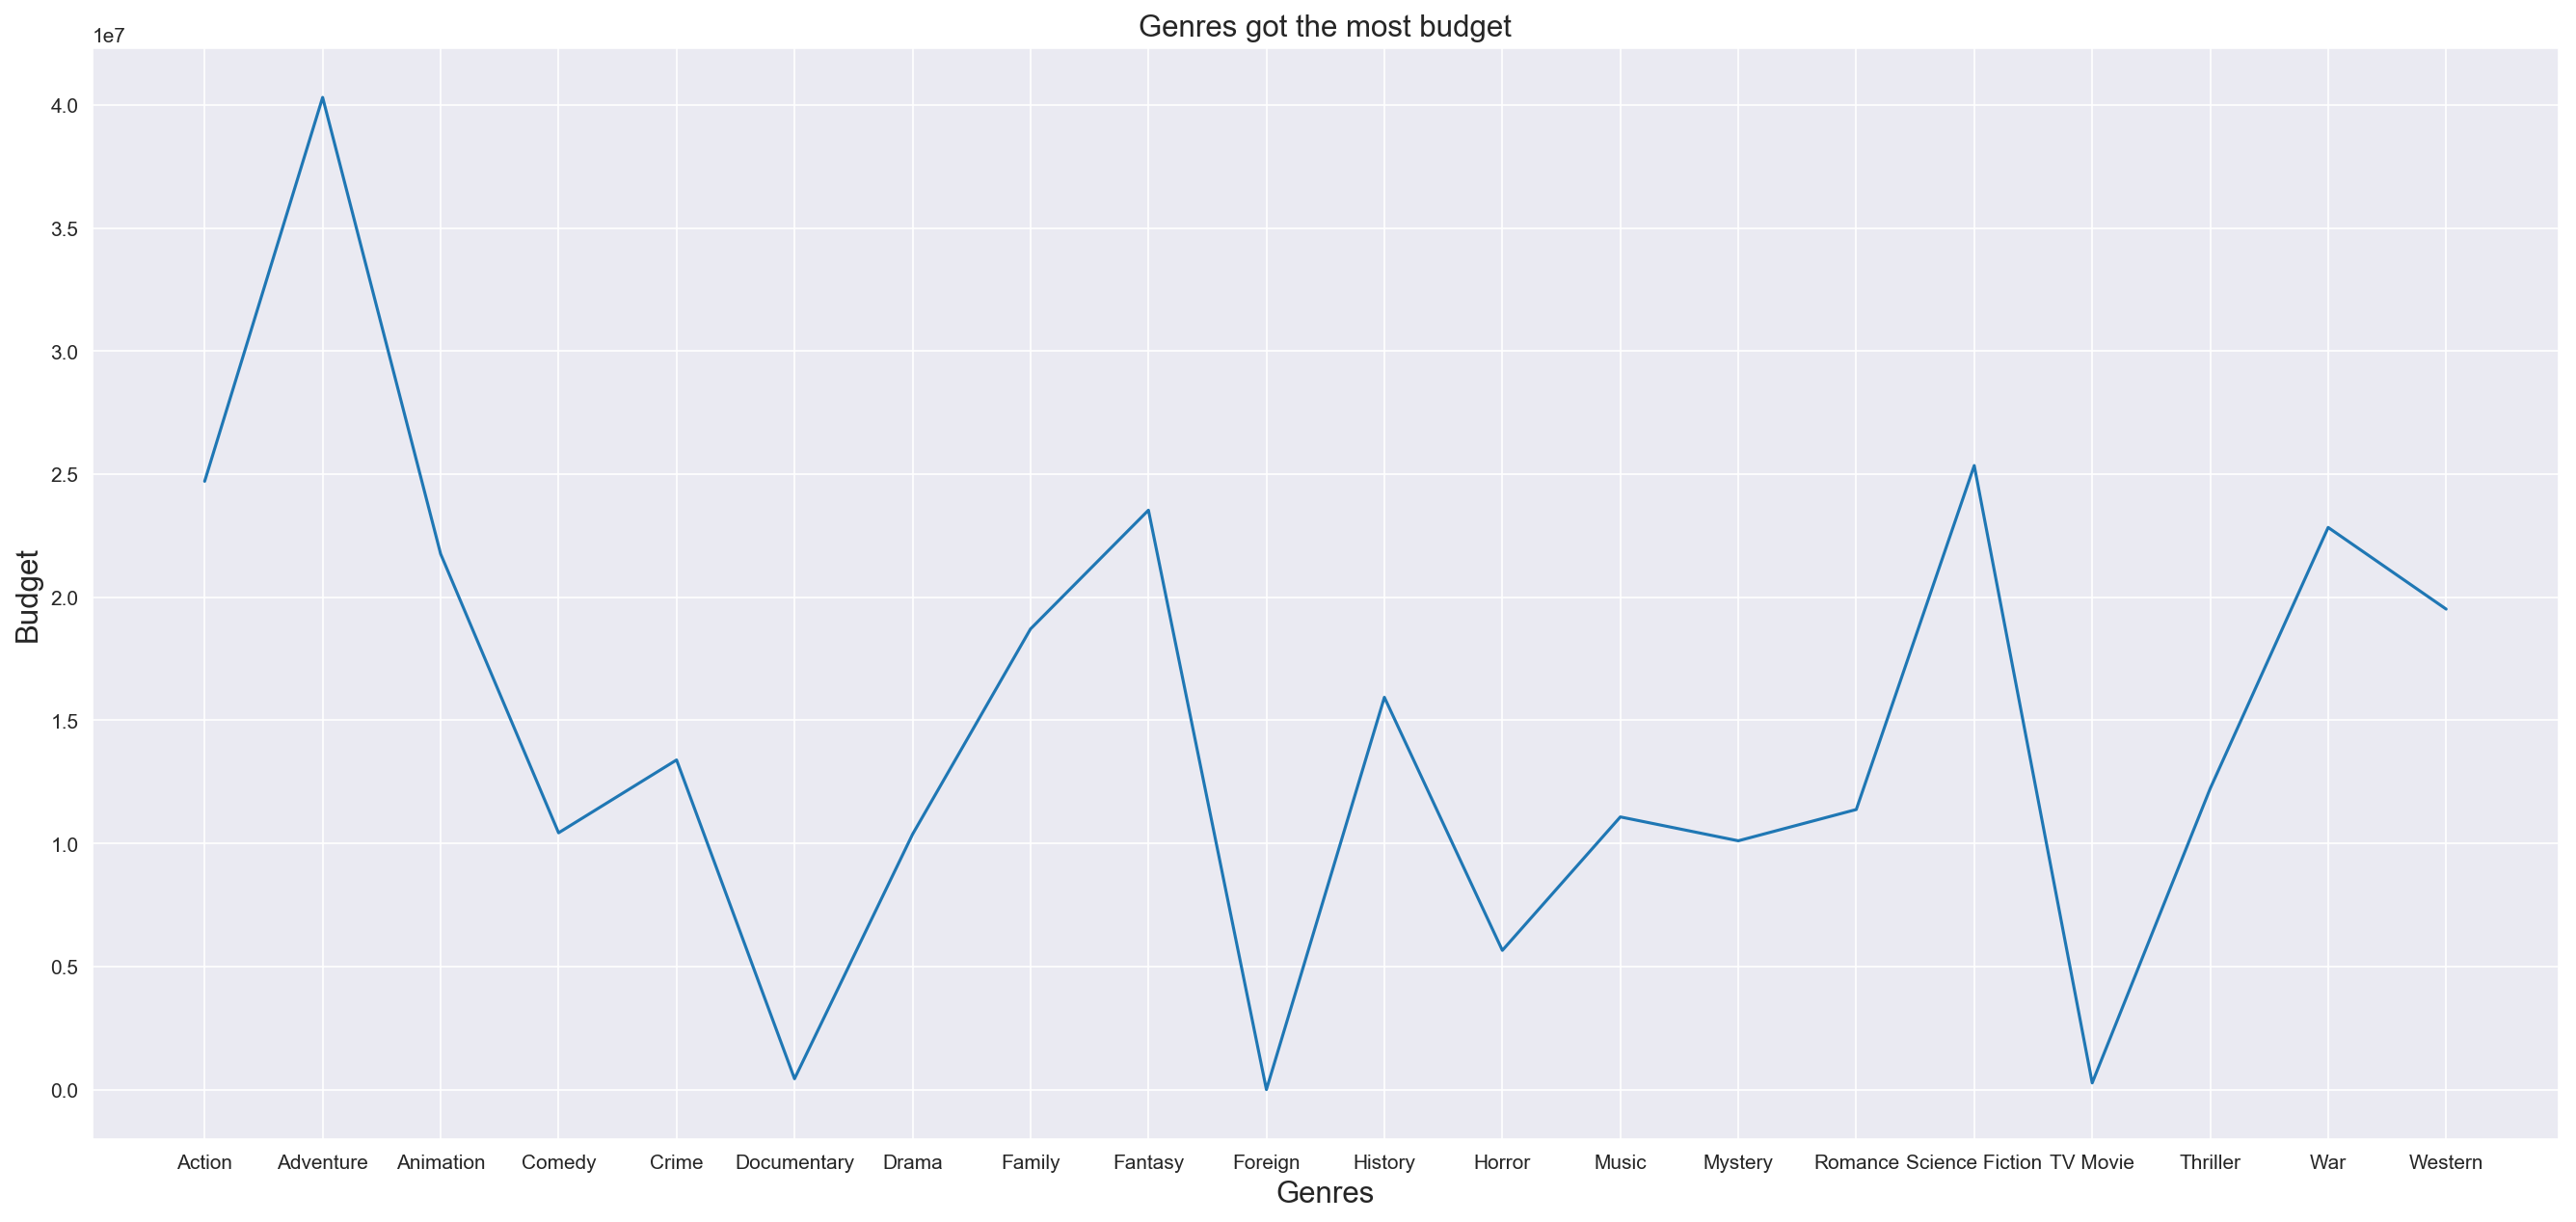

In [78]:
budget_genres =clean_df.groupby("genres")["budget"].mean()
plt.figure(figsize= (22,10),dpi = 150)
plt.xlabel("Genres" ,fontsize = 15)
plt.ylabel("Budget",fontsize = 15)
plt.title("Genres got the most budget",fontsize = 15)
plt.plot(budget_genres) ;

- The most budgets goes to adventure movies and after it comes Sci-Fi and Action movies.

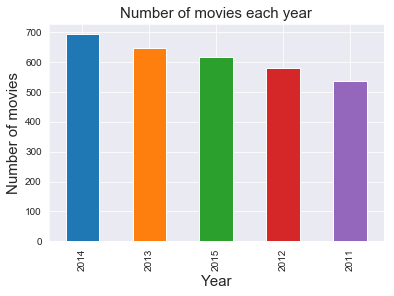

In [79]:
movies_count = clean_df.release_year.value_counts().head(5)
plt.xlabel("Year" ,fontsize = 15)
plt.ylabel("Number of movies",fontsize = 15)
plt.title("Number of movies each year",fontsize = 15)
movies_count.plot.bar();

- The most movies that released was in 2014.

In [80]:
clean_df.vote_count.describe()

count    10771.000000
mean       219.133599
std        577.849529
min         10.000000
25%         17.000000
50%         39.000000
75%        147.000000
max       9767.000000
Name: vote_count, dtype: float64

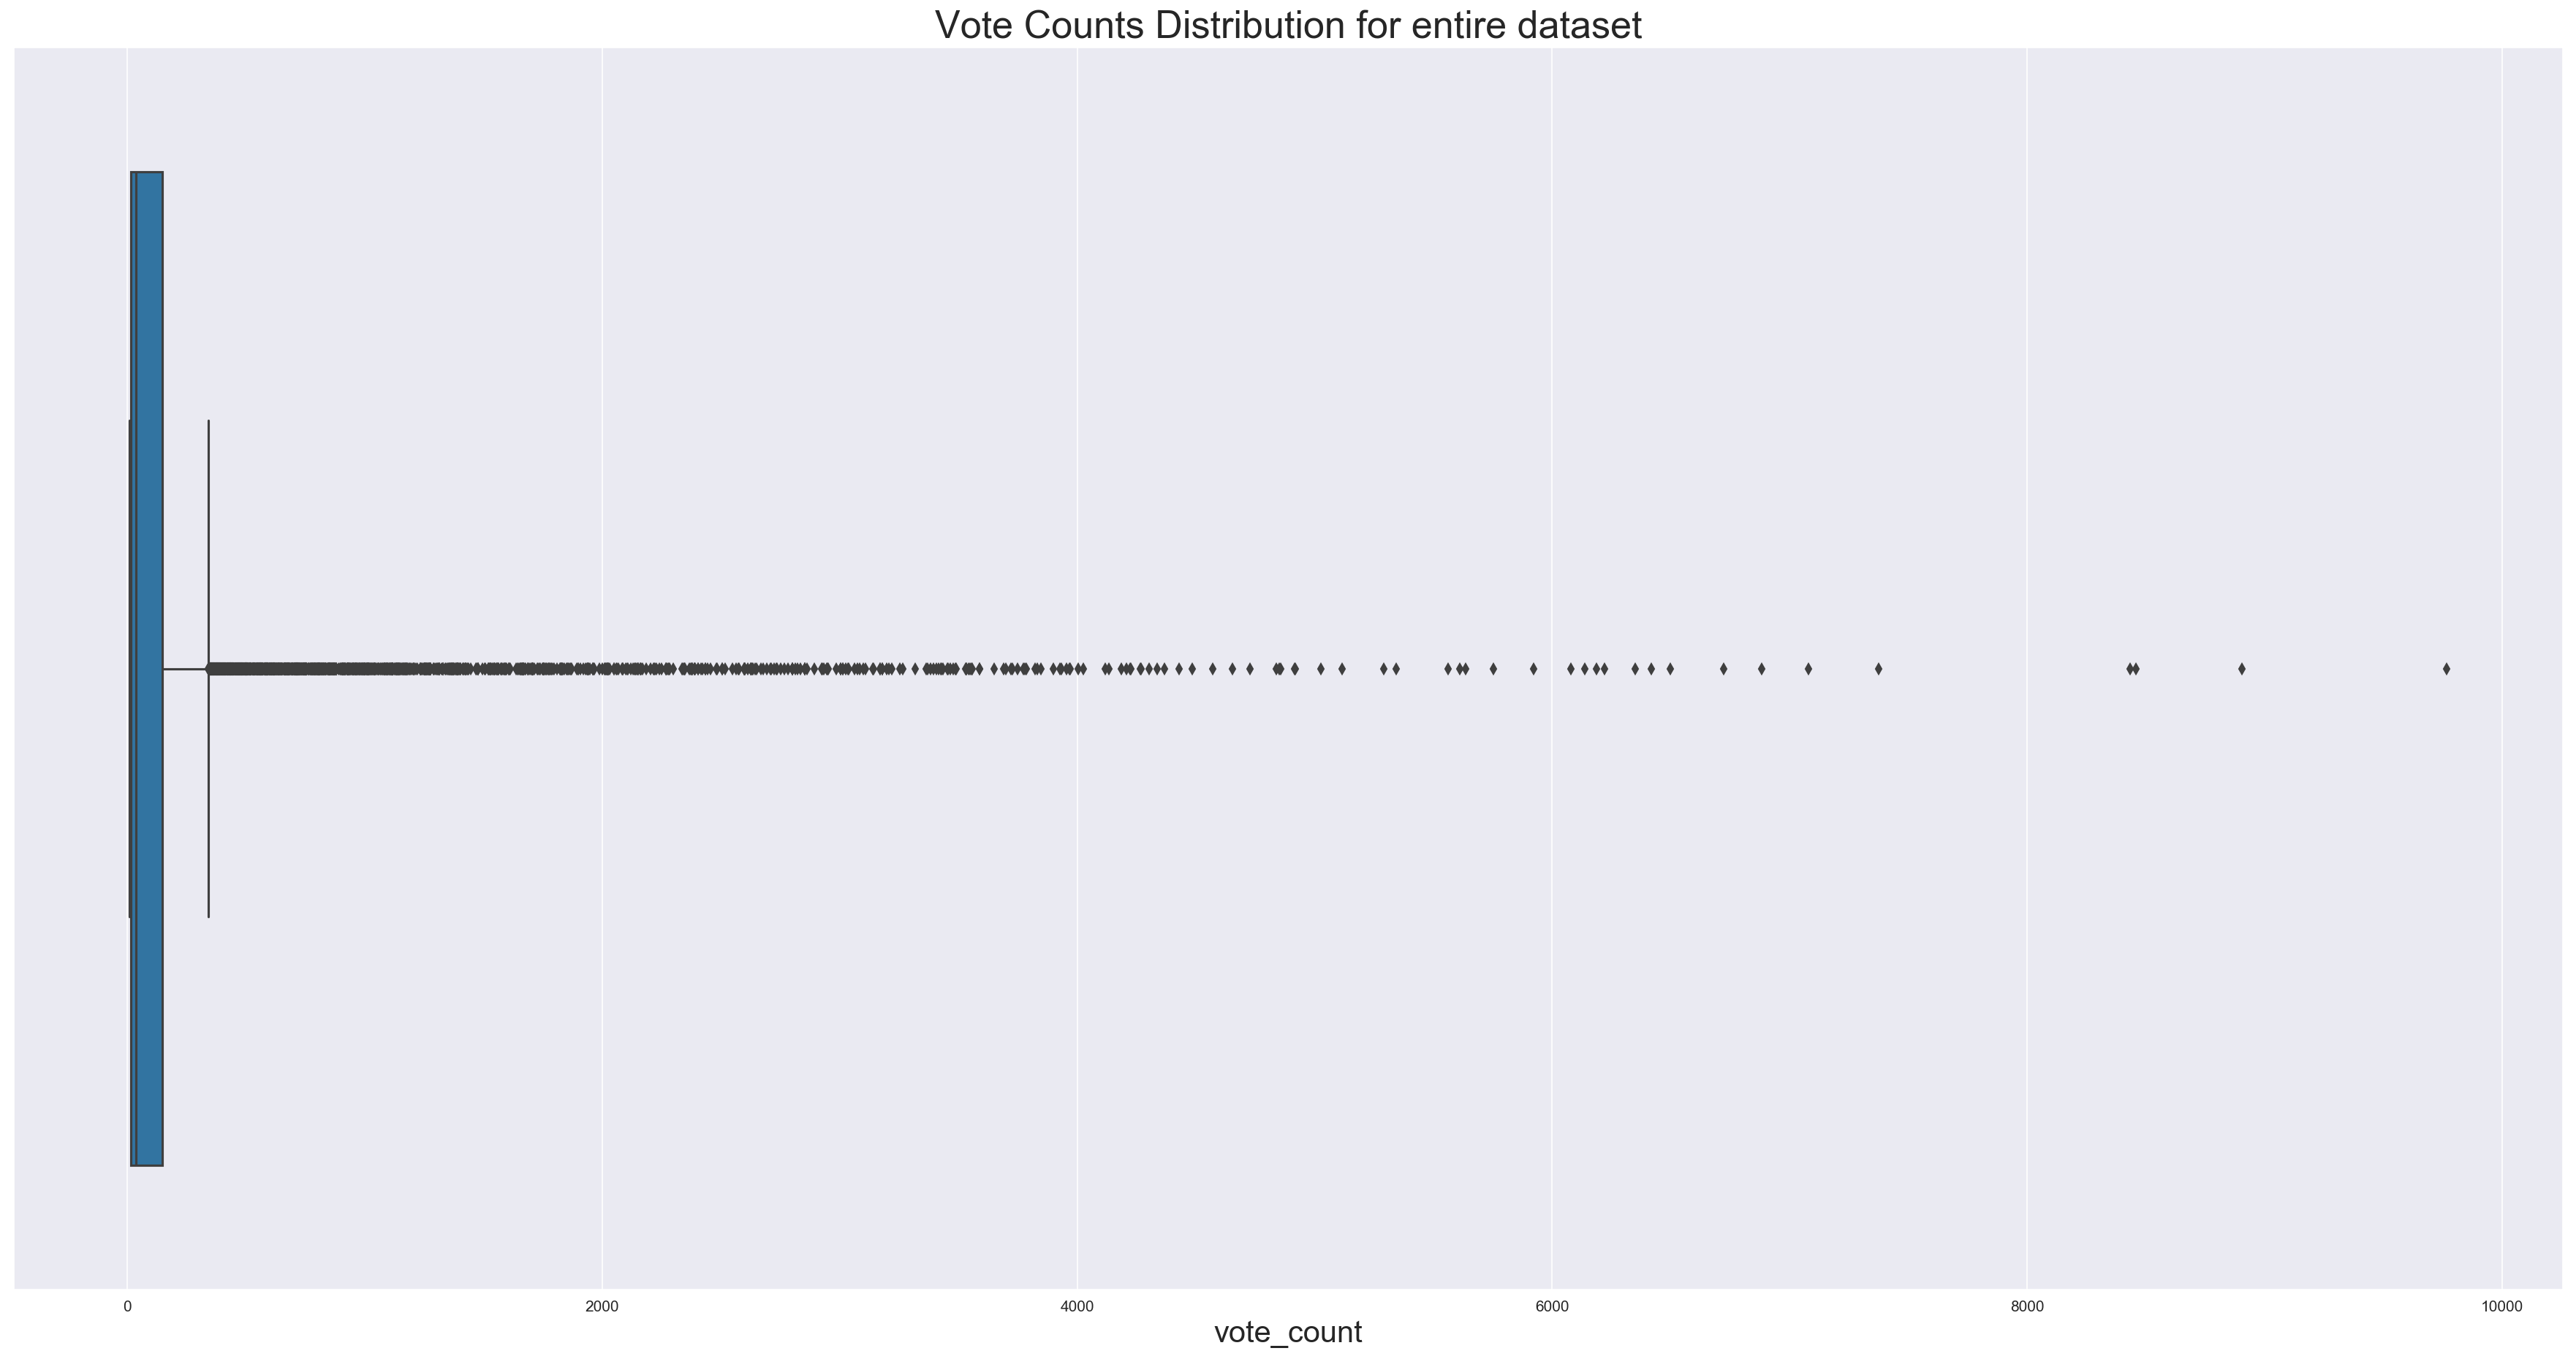

In [81]:
vote_counts_all = clean_df["vote_count"]
plt.figure(figsize= (30,15),dpi = 150)
plt.xlabel("vote_count" ,fontsize = 20)
plt.title("Vote Counts Distribution for entire dataset",fontsize = 25)
sns.boxplot(vote_counts_all) ;

- The vote counts distribution for the entire data set appears that the minimum counts 10 votes and the maximum 9767 Votes.

> when Q1 of votes is 17

> when Q2(median) of votes is 39.

> when Q3 of votes is 147.

- IQR range from 17 vote to 147

- also appears huge amount of outliers in this distribution.

<a id='conclusions'></a>
## Conclusions

### List of directors have movies in the top 20 rated movies.

- Pete Docter
- Lenny Abrahamson
- Christopher Nolan 
- Morten Tyldum
- Damien Chazelle
- David Fincher
- Frank Darabont 
- Quentin Tarantino
- Robert Zemeckis
- Francis Ford Coppola 
- Irvin Kershner
- Bryan Singer
- Tony Kaye
- MiloÅ¡ Forman
- Martin Scorsese
- Alfred Hitchcock
- Steven Spielberg

when Christopher Nolan, Frank Darabont and Francis Ford Coppola got 2 films in top 20 rated movies.

- The average budget for top rated movie is 43.6 million and 2.35 h run time, but in general data set results of about 14.7 Million and 1.7 h run time.
- It is not necessary that the highest rated movie got the highest profit.
- The most perfered Genre in the top rated movies was Drama but in general the data set study result of adventure genre becomes first and Sci-Fi after.
- There are a decline in the movies that realesed in 2015 after it was great at 2014 with 3 top rated movies
- There are a huge amount of outliers values in vote counts and dropping them will heavily affect the data set.

## The analysis results is limited  because the data was not sufficient  enough. There are rows with NaN values and there are many rows with 0 values. That leaded to drop many lines that can have an impact on the results.